# **Importing Neccesary Libraries**

---



In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Loading the Dataset**

---



In [135]:
df = pd.read_csv("Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [137]:
df.shape

(891, 12)

In [138]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# **Check for NULL Values**

---



In [139]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [140]:
df["Age"] = df["Age"].fillna(df["Age"].median())

In [141]:
df = df.drop("Cabin", axis=1)

In [142]:
df = df.dropna()

In [143]:
df.shape

(889, 11)

In [144]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# **Data Visualisation**

---



<Axes: xlabel='Sex', ylabel='Survived'>

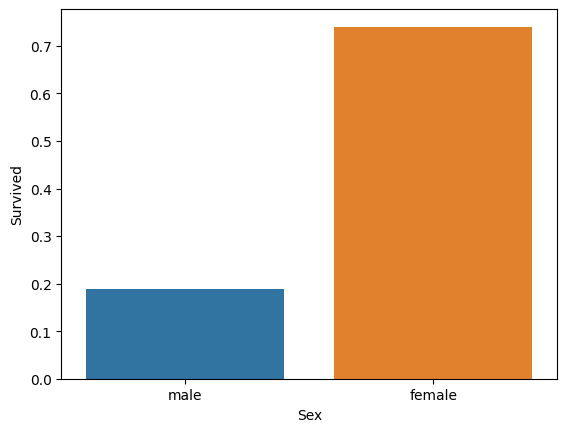

In [145]:
sns.barplot(x = df["Sex"], y = df["Survived"], errorbar=("ci", 0))

<Axes: xlabel='Embarked', ylabel='Survived'>

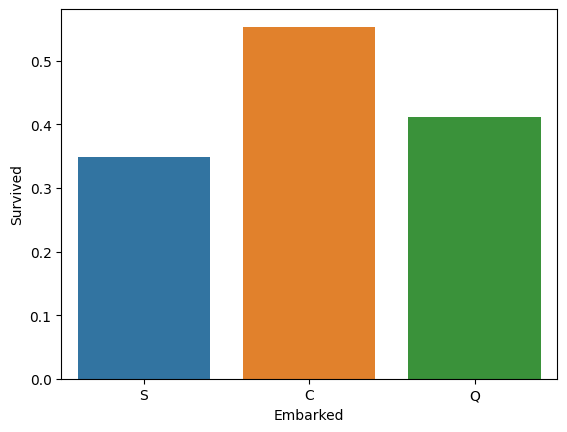

In [177]:
sns.barplot(x = df["Embarked"], y = df["Survived"], errorbar=("ci", 0))

Text(0.5, 1.0, 'Age vs Survival')

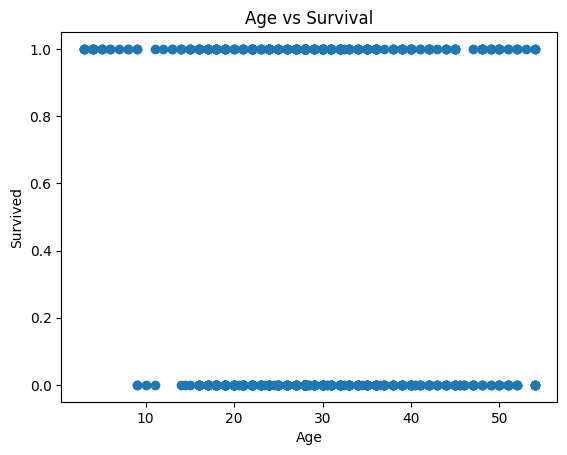

In [182]:
plt.scatter(df["Age"], df["Survived"])
plt.xlabel("Age")
plt.ylabel("Survived")
plt.title("Age vs Survival")

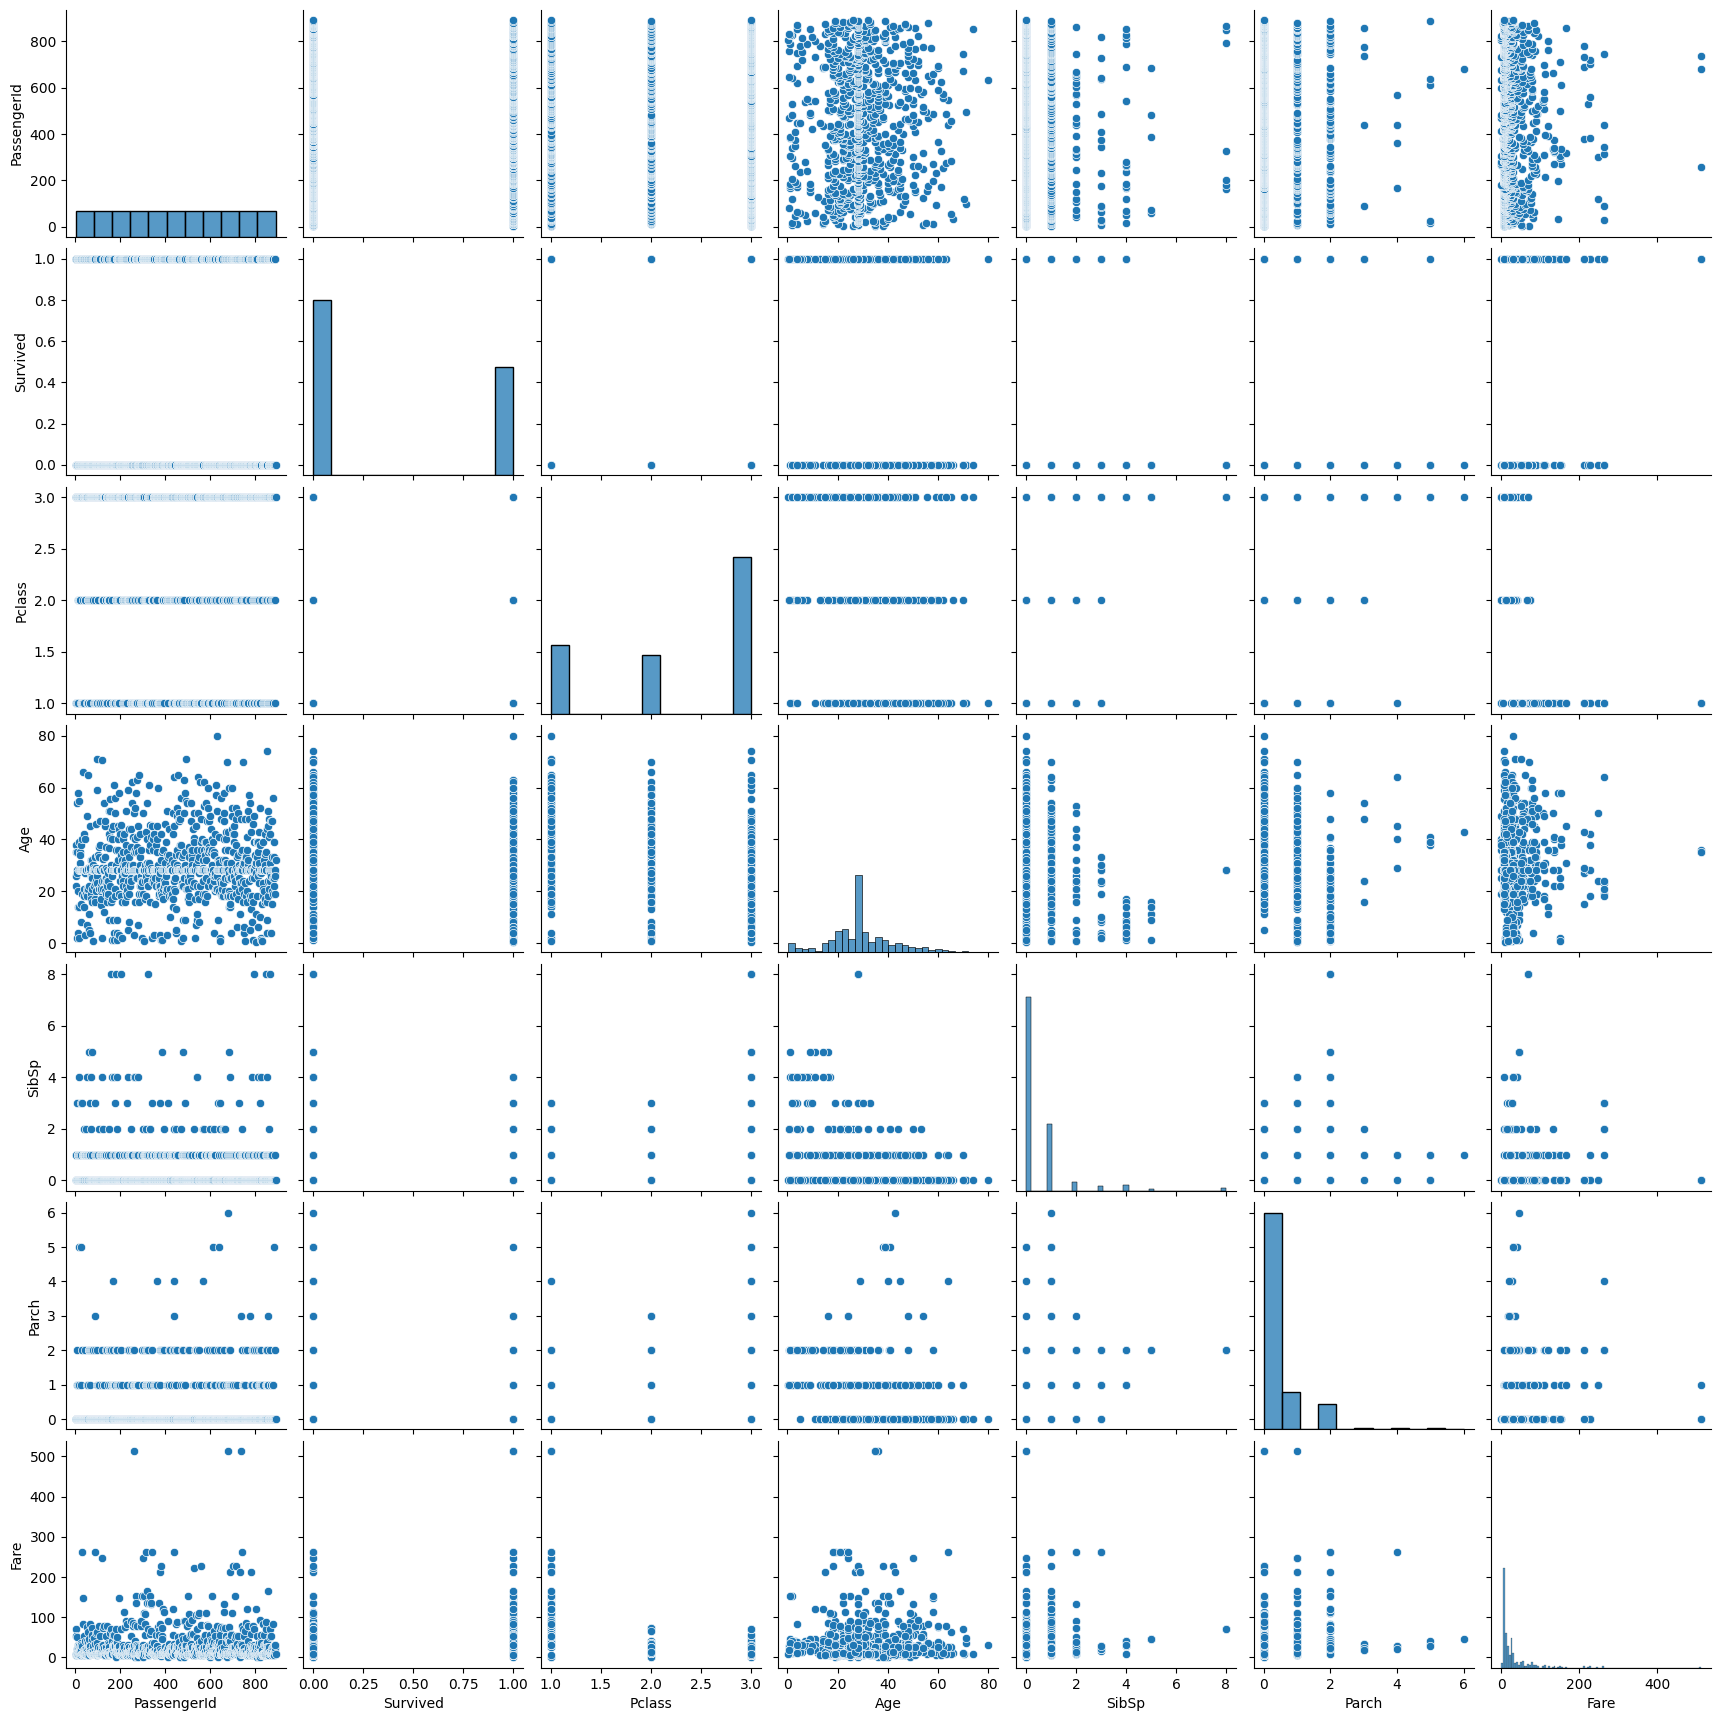

In [146]:
sns.pairplot(df)

<ipython-input-147-6dc1c4c1753e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

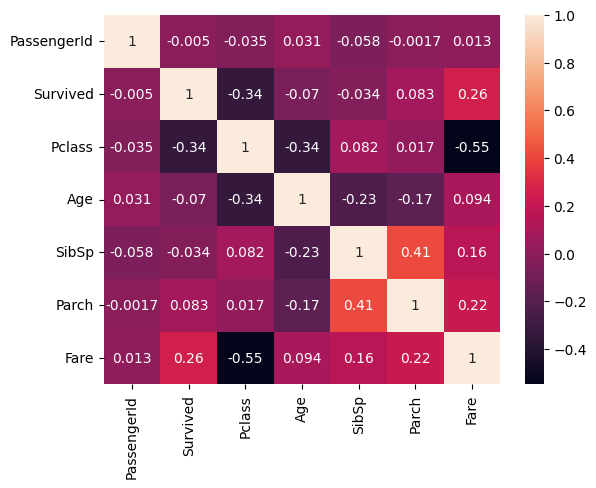

In [147]:
sns.heatmap(df.corr(), annot=True)

# **Outlier Detection**

---



<Axes: >

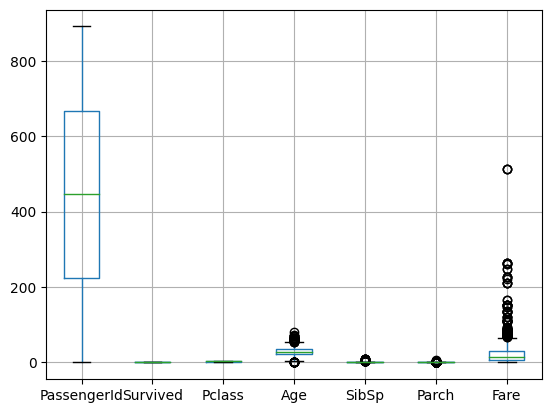

In [148]:
df.boxplot()

<Axes: >

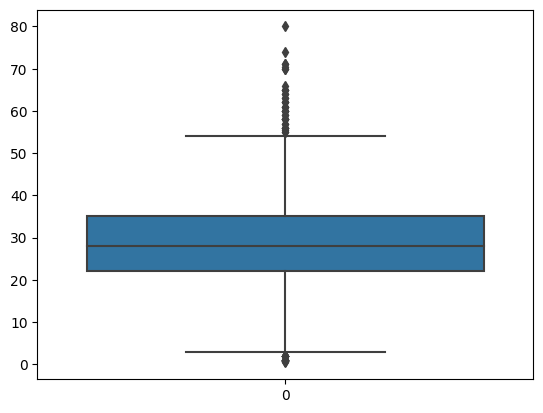

In [149]:
sns.boxplot(df["Age"])

In [150]:
age_q1 = df["Age"].quantile(0.25)
age_q3 = df["Age"].quantile(0.75)
age_iqr = age_q3 - age_q1

age_ll = age_q1 - 1.5*age_iqr
age_ul = age_q3 + 1.5*age_iqr

In [151]:
df["Age"] = np.where(df["Age"] > age_ul, df["Age"].median(), df["Age"])
df["Age"] = np.where(df["Age"] < age_ll, df["Age"].median(), df["Age"])

<Axes: >

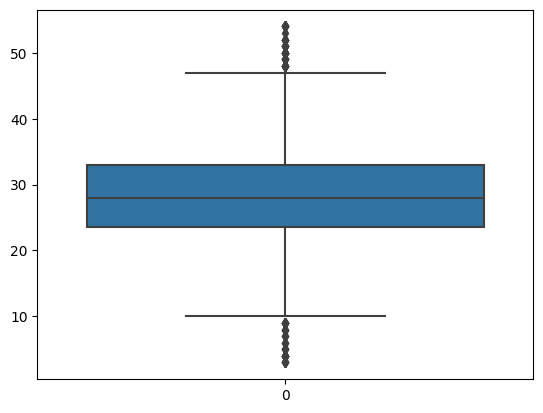

In [152]:
sns.boxplot(df["Age"])

<Axes: >

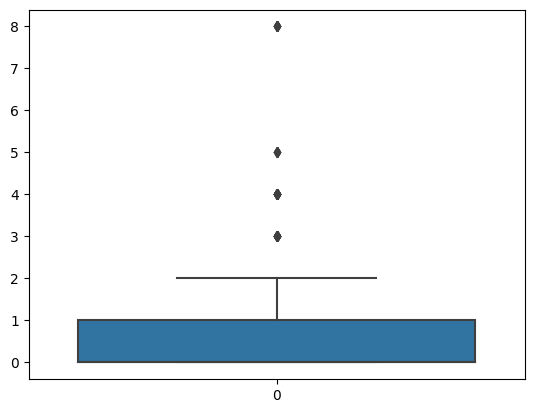

In [153]:
sns.boxplot(df["SibSp"])

In [154]:
sib_q1 = df["SibSp"].quantile(0.25)
sib_q3 = df["SibSp"].quantile(0.75)
sib_iqr = sib_q3 - sib_q1

ul = sib_q3 + 1.5*sib_iqr

In [155]:
df = df[df["SibSp"] < ul]

In [156]:
df.shape

(843, 11)

<Axes: >

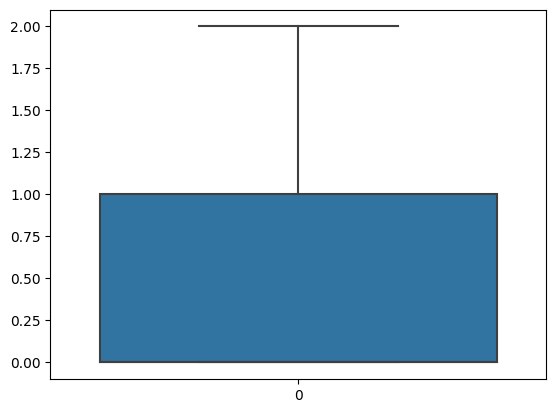

In [157]:
sns.boxplot(df["SibSp"])

<Axes: >

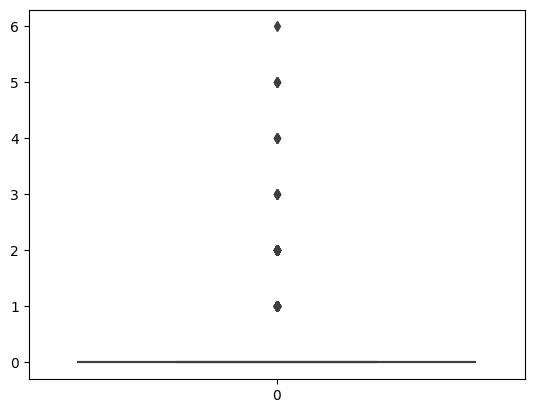

In [158]:
sns.boxplot(df["Parch"])

In [159]:
df["Parch"].median()

0.0

In [160]:
df["Parch"] = np.where(df["Parch"]!=0, 0, df["Parch"])

<ipython-input-160-46fa9ca814ad>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Parch"] = np.where(df["Parch"]!=0, 0, df["Parch"])


<Axes: >

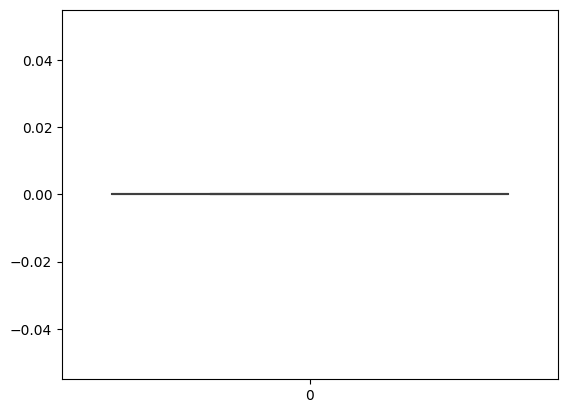

In [161]:
sns.boxplot(df["Parch"])

# **Splitting Dependendent & Independent Variables**

---



In [162]:
X = df.drop(["Survived", "Name", "PassengerId", "Fare", "Ticket", "Parch"], axis=1)
y = df["Survived"]

In [163]:
X.head()

,Pclass,Sex,Age,SibSp,Embarked
0,3,male,22.0,1,S
1,1,female,38.0,1,C
2,3,female,26.0,0,S
3,1,female,35.0,1,S
4,3,male,35.0,0,S


In [164]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

# **Encoding Categorical Variables**

---



In [165]:
from sklearn.preprocessing import LabelEncoder

sex_le = LabelEncoder()
emb_le = LabelEncoder()

In [166]:
X["Sex"] = sex_le.fit_transform(X["Sex"])

In [167]:
X["Embarked"] = emb_le.fit_transform(X["Embarked"])

In [168]:
X.head()

,Pclass,Sex,Age,SibSp,Embarked
0,3,1,22.0,1,2
1,1,0,38.0,1,0
2,3,0,26.0,0,2
3,1,0,35.0,1,2
4,3,1,35.0,0,2


# **Featuring Scaling**

---



In [169]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

In [170]:
X_scaled = pd.DataFrame(ms.fit_transform(X), columns = X.columns)

# **Splitting into Training & Testing Sets**

---



In [171]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

In [172]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((674, 5), (169, 5), (674,), (169,))

In [173]:
X_train.head()

,Pclass,Sex,Age,SibSp,Embarked
416,0.5,0.0,0.196078,0.0,1.0
193,0.5,1.0,0.529412,0.0,1.0
2,1.0,0.0,0.450980,0.0,1.0
834,1.0,0.0,0.372549,0.0,1.0
775,0.5,1.0,0.549020,0.5,0.0


In [174]:
X_test.head()

,Pclass,Sex,Age,SibSp,Embarked
380,1.0,1.0,0.490196,0.0,1.0
549,0.0,1.0,0.647059,0.0,0.0
645,0.0,1.0,0.470588,0.0,0.0
542,0.5,0.0,0.607843,0.0,1.0
671,1.0,1.0,0.490196,0.5,0.0


In [175]:
y_train.head()

446    1
213    0
2      1
882    0
817    0
Name: Survived, dtype: int64

In [176]:
y_test.head()

410    0
583    0
681    1
576    1
709    1
Name: Survived, dtype: int64